## Problem Statement

- Insurance fraud is a huge problem in the industry. 


- It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.


- In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 


- In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# code to display rows and columns

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Code to display all the columns in the dataset
pd.set_option('display.max_columns', None)

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [6]:
df = pd.read_csv("frau.csv")

In [7]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


### Column Info

- Months as a customer: no of months the customer has been part of the policy

- age: age of the customer

- Policy number: Policy name of the customer

- policy_bind_date: The representative of the insurance company, confirms that coverage is in place

- Policy state: the state of the existing policy OH, IL, IN

- Policy CSI:  CSI Policy Manual is a collection of documents that defines our rules, policies, and procedures

- Policy Deductible: It is the amount that a policyholder has to pay before the insurance company starts paying up

- policy annual premium: The amount paid annually

- umbrella_limit: Additional coverage to the existing policy

- insured_zip: The zip code of the customer

- insured_sex: The gender of the customer

- insured_education_level: education level of the individual

- insured_occupation: Occupation of the customer

- insured_hobbies: Hobbies of the customer

- insured_relationship: Relationships of the customer

- capital-gains: Amount of profit gained

- capital-loss: The number of losses that occurred

- incident_date: Date of accident

- incident_type: Type of incident that occurred

- collision_type: Type of accident

- incident_severity: How severe the accident was

- authorities_contacted: The authorities contacted after the accident

- incident_state: In which state did the incident occur

- incident_city: The city in which the incident occurred

- incident_location: The location of the incident

- incident_hour_of_the_day: The hour in which the incident occurred

- number_of_vehicles_involved: The number of vehicles involved

- property_damage: if any kind of property was damaged or not

- bodily_injuries: No of individuals injured

- witnesses: The number of people who witnessed the incident

- police_report_available: The availability of the police report

- total_claim_amount: The amount to be claimed

- injury_claim: The injury claim amount

- property_claim: The property claim amount

- vehicle_claim: The amount of vehicle claim 

- auto_make: The company of the automobile

- auto_model: The model of the automobile

- auto_year: The Auto manufacturing year

- fraud_reported:  if an insurance claim is fraudulent or not. 

## Problem Type

Conclusions after understanding the data set:-

- 1) The target variable is fraud_reported

- 2) The target variable is categorical in nature

- 3) Solving it as a Classification Problem

- 4) On the circumstances given we need to predict if an insurance claim is fraudulent or not

## Checking the data types

In [8]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

## Data types include:

- Object
- Int
- float

### Lets check for duplicate values

In [9]:
df.duplicated().sum()

0

### No duplicates in the dataset

### Lets check for missing values

In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

#### Missing values in _c39

### Data Shape

In [11]:
df.shape

(1000, 40)

Rows : 1000
    
Columns : 40

#### Checking the column names

In [12]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

## EDA

In [13]:
sns.set_theme(style="darkgrid")

In [14]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Lets drop "_c39" as the column does not make sense

In [15]:
df = df.drop("_c39",axis=1)

In [16]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


<AxesSubplot:xlabel='months_as_customer', ylabel='Count'>

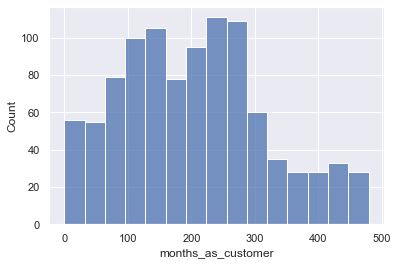

In [17]:
#Univariate
sns.histplot(x="months_as_customer",data=df)

Observations from the plot:

The average months of Customers being part of the insurance company is 203 (~ 17 years)

The maximum number of months that a customer has been part of an insaurance company is 497 (~ 41 years)

<AxesSubplot:xlabel='age', ylabel='Count'>

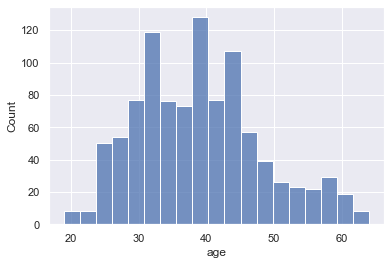

In [18]:
#Univariate
sns.histplot(x="age",data=df)

Observations from the plot:

The average age for an individyal is 38 years

Max age of an individual is upto 64 years

In [19]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


Using pandas Date Time method for furthur analysis

Lets create 3 more columns for policy bind date

- Date

- Month 

- Day

In [20]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['policy_bind_Month']=df['policy_bind_date'].apply(lambda a:a.month)
df['policy_bind_Day']=df['policy_bind_date'].apply(lambda a:a.day)

<AxesSubplot:xlabel='policy_bind_Month', ylabel='Count'>

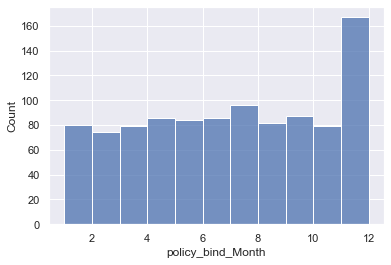

In [21]:
sns.histplot(x="policy_bind_Month",data=df)

Observations from the plot:

Policy bind date is the date when representative of the insurance company, confirms that coverage is in place

Most of the policy bind date conformations are occurring in the month of December

<AxesSubplot:xlabel='policy_state', ylabel='count'>

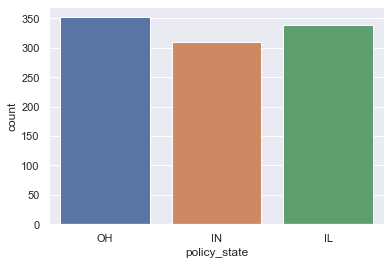

In [22]:
sns.countplot(x="policy_state",data=df)

Observations from the plot:

Most of the policy state is (OH state)

Very few policy state in (IN stste)

In [23]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Month,policy_bind_Day
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,10,17
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,6,27
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,25
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6


For policy_csl we have values like 250/500.

We need to create seprate columns for that

250 -----> Amount per person (PP)
 
500 -----> Per Accident (PA)

Lets create two new columns

In [24]:
df["policy_csl_PP"] = df["policy_csl"].str.split("/").str[0]

In [25]:
df["policy_csl_PA"] = df["policy_csl"].str.split("/").str[1]

In [26]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Month,policy_bind_Day,policy_csl_PP,policy_csl_PA
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,10,17,250,500
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,6,27,250,500
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9,100,300
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,25,250,500
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,500,1000


Droping the "policy_csl" column

In [27]:
df = df.drop("policy_csl",axis=1)

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

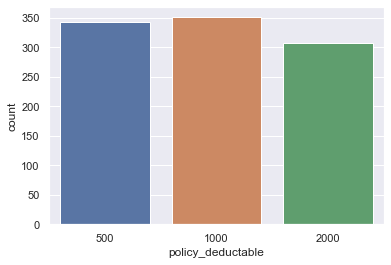

In [28]:
sns.countplot(x="policy_deductable",data=df)

Observations from the plot:

Policy Deductable is the amount that a policyholder has to pay before the insurance company starts paying up

1000 $ is the highest Policy Deductable amount

500 $ is the lowest Policy Deductable amount

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Count'>

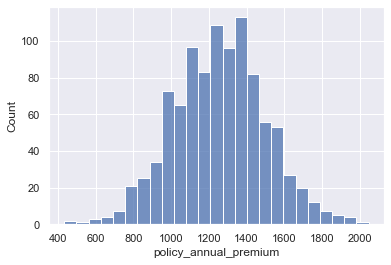

In [29]:
sns.histplot(x="policy_annual_premium",data=df)

Observations from the plot:

The average amount paid annually is ~ 1256 $

Least amount paid annually is ~ 430 $

<AxesSubplot:xlabel='age', ylabel='policy_annual_premium'>

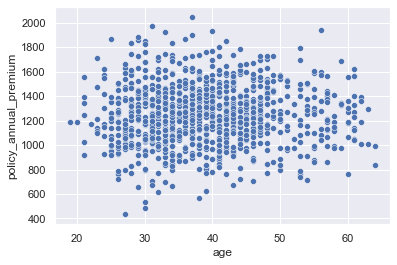

In [30]:
sns.scatterplot(x="age",y="policy_annual_premium",data=df)

Observations from the plot:

Individuals between the age 30 - 40 are being paid higher amounts annually 

Individuals between the age 18 - 25 are being paid lower amounts annually 

<AxesSubplot:xlabel='count', ylabel='umbrella_limit'>

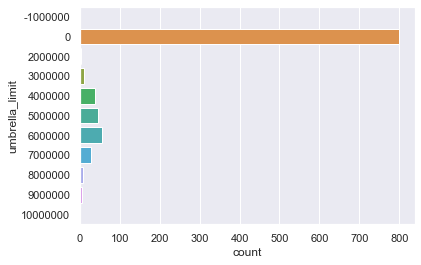

In [31]:
sns.countplot(y="umbrella_limit",data=df)

Observations from the plot:

Very few individuals have Additional coverage to the existing policy

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

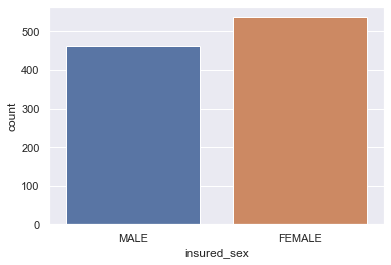

In [32]:
sns.countplot(x="insured_sex",data=df)

Observations from the plot:

More Female individuals are insured then men 

<AxesSubplot:xlabel='insured_sex', ylabel='policy_annual_premium'>

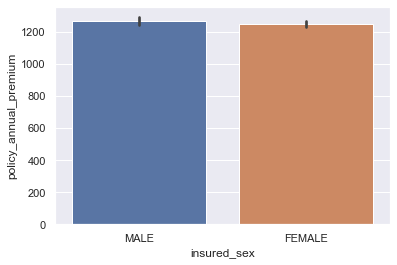

In [33]:
sns.barplot(x="insured_sex",y="policy_annual_premium",data=df)

Observations from the plot:

Male candidates are receiving slightly higher policy premiums then female 

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

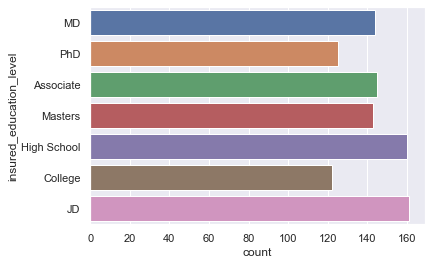

In [34]:
sns.countplot(y="insured_education_level",data=df)
df["insured_education_level"].value_counts()

Observations from the plot:

The majority insured education level of individuals is JD

Very few individuals are just college passouts

<AxesSubplot:xlabel='count', ylabel='insured_education_level'>

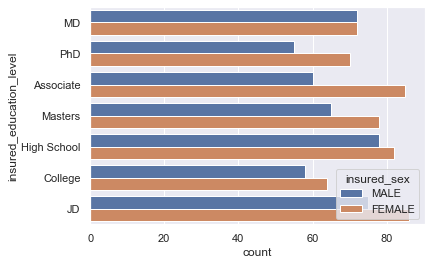

In [35]:
sns.countplot(y="insured_education_level",hue="insured_sex",data=df)

Observations from the plot:

Female candidates are more educated then male candidates 

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

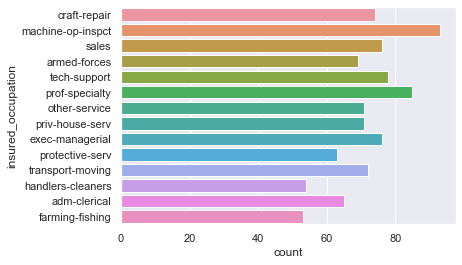

In [36]:
sns.countplot(y="insured_occupation",data=df)
df["insured_occupation"].value_counts()

Observations from the plot:

Most of the insured occupants are working in Machine Op Inspct

Very few insured occupants are working in farming-fishing

reading           64
paintball         57
exercise          57
bungie-jumping    56
golf              55
camping           55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

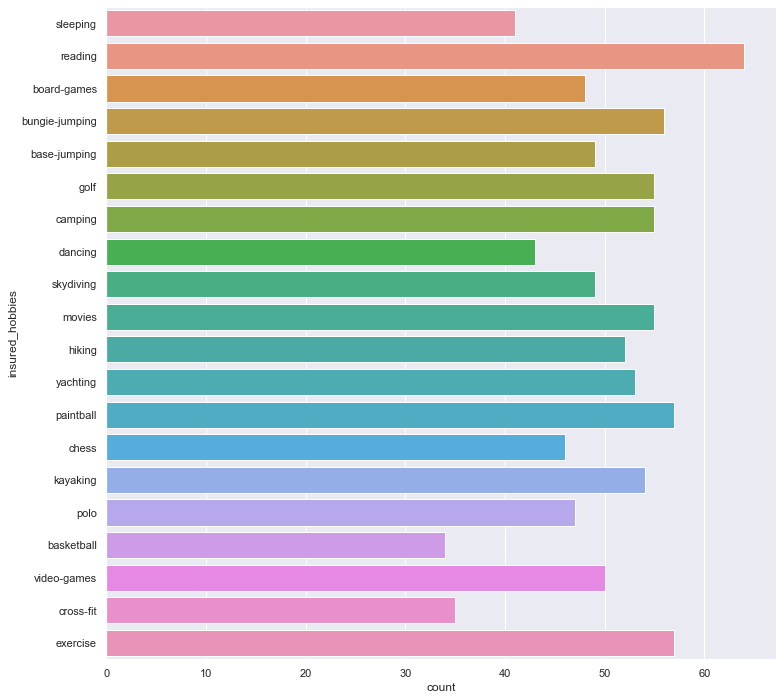

In [37]:
plt.figure(figsize=(12,12))
sns.countplot(y="insured_hobbies",data=df)
df["insured_hobbies"].value_counts()

Observations from the plot:

Reading is a major hobby among insured individual

In [38]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Month,policy_bind_Day,policy_csl_PP,policy_csl_PA
0,328,48,521585,2014-10-17,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,10,17,250,500
1,228,42,342868,2006-06-27,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,6,27,250,500
2,134,29,687698,2000-06-09,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9,100,300
3,256,41,227811,1990-05-25,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,25,250,500
4,228,44,367455,2014-06-06,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,500,1000


Using pandas Date Time method for furthur analysis

Lets create 3 more columns for incident_date

- Date

- Month 

- Day

In [39]:
df['incident_date']=pd.to_datetime(df['incident_date'])
df['incident_date_Month']=df['incident_date'].apply(lambda a:a.month)
df['incident_date_Day']=df['incident_date'].apply(lambda a:a.day)

In [40]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Month,policy_bind_Day,policy_csl_PP,policy_csl_PA,incident_date_Month,incident_date_Day
0,328,48,521585,2014-10-17,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,10,17,250,500,1,25
1,228,42,342868,2006-06-27,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,6,27,250,500,1,21
2,134,29,687698,2000-06-09,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9,100,300,2,22
3,256,41,227811,1990-05-25,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,25,250,500,10,1
4,228,44,367455,2014-06-06,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,500,1000,2,17


Droping the "policy_bind_date" and "incident_date" from the dataframe

In [41]:
df = df.drop(["policy_bind_date","incident_date"],axis=1)

In [42]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Month,policy_bind_Day,policy_csl_PP,policy_csl_PA,incident_date_Month,incident_date_Day
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,10,17,250,500,1,25
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,6,27,250,500,1,21
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9,100,300,2,22
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,25,250,500,10,1
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,500,1000,2,17


Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

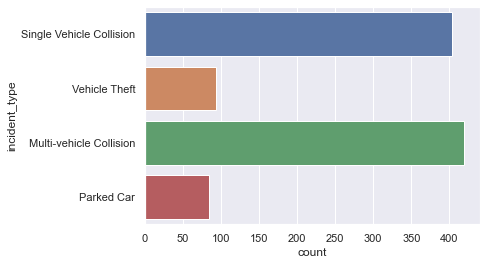

In [43]:
sns.countplot(y="incident_type",data=df)
df["incident_type"].value_counts()

Observations from the plot:

The majority of the automobile accidents were caused due to Multi-Vehicle collusion

The least amount of incidents were about a parking ticket

In [44]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Month,policy_bind_Day,policy_csl_PP,policy_csl_PA,incident_date_Month,incident_date_Day
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,10,17,250,500,1,25
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,6,27,250,500,1,21
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9,100,300,2,22
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,25,250,500,10,1
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,500,1000,2,17


In [45]:
df["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

We need to replace the "?" value in collision_type with "No Collusion" as it is related to the "Vehicle Theft" value in the column "incident_type"

In [46]:
df["collision_type"] = df["collision_type"].replace("?", "No Collusion")

In [47]:
df["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
No Collusion       178
Name: collision_type, dtype: int64

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

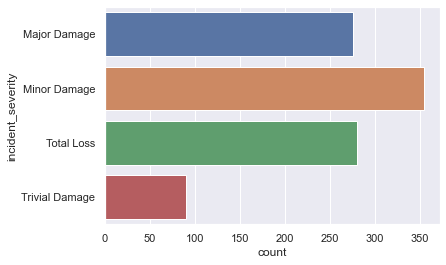

In [48]:
sns.countplot(y="incident_severity",data=df)
df["incident_severity"].value_counts()

Observations from the plot:

Most of the automobiles have minor damage

A very less number of cars are having Trivial damage (almost no damage)

In [49]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Month,policy_bind_Day,policy_csl_PP,policy_csl_PA,incident_date_Month,incident_date_Day
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,10,17,250,500,1,25
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,No Collusion,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,6,27,250,500,1,21
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9,100,300,2,22
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,25,250,500,10,1
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,No Collusion,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,500,1000,2,17


Rear Collision     292
Side Collision     276
Front Collision    254
No Collusion       178
Name: collision_type, dtype: int64

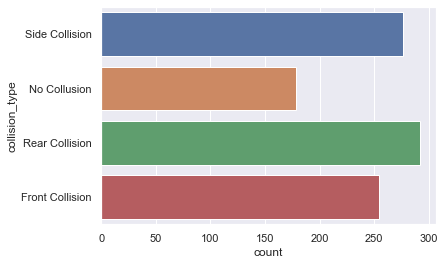

In [50]:
sns.countplot(y="collision_type",data=df)
df["collision_type"].value_counts()

Observations from the plot:

In most of the cases, the collision type was Rear collision

<AxesSubplot:xlabel='count', ylabel='authorities_contacted'>

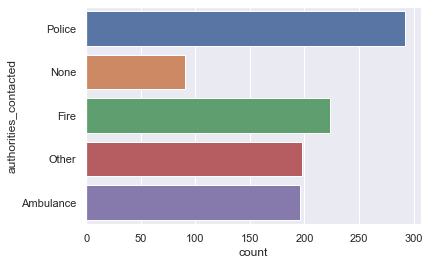

In [51]:
sns.countplot(y="authorities_contacted",data=df)

Observations from the plot:

In most of the incidents the Police were informed first    

<AxesSubplot:xlabel='count', ylabel='incident_state'>

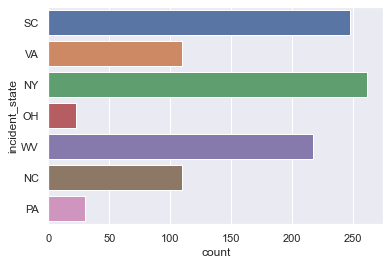

In [52]:
sns.countplot(y="incident_state",data=df)

Observations from the plot:

Most of the accidents occurred in the state of New York

The least number of accidents occurred in the state of Ohio

<AxesSubplot:xlabel='count', ylabel='incident_city'>

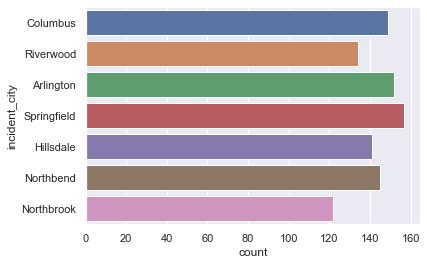

In [53]:
sns.countplot(y="incident_city",data=df)

Observations from the plot:

Most of the accidents occurred in the city of Springfield

The least number of accidents occurred in the city of Northbrook

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

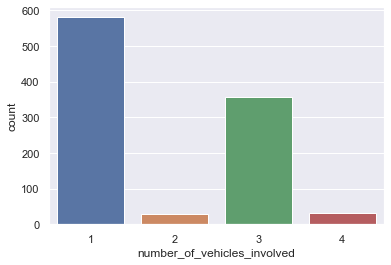

In [54]:
sns.countplot(x="number_of_vehicles_involved",data=df)
df["number_of_vehicles_involved"].value_counts()

Observations from the plot:

Most of the time there were not more than one vehicle involved in an accident

Very rarely more than 4 vehicles were involved in an accident

In [55]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Month,policy_bind_Day,policy_csl_PP,policy_csl_PA,incident_date_Month,incident_date_Day
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,10,17,250,500,1,25
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,No Collusion,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,6,27,250,500,1,21
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9,100,300,2,22
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,25,250,500,10,1
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,No Collusion,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,500,1000,2,17


In [56]:
df["property_damage"].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [57]:
df["property_damage"] = df["property_damage"].replace("?","NO")

In [58]:
df["property_damage"].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

<AxesSubplot:xlabel='count', ylabel='property_damage'>

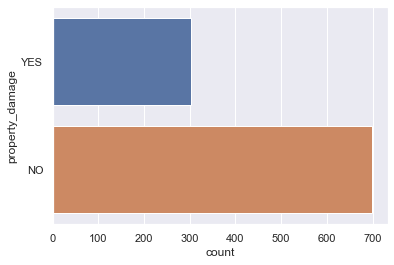

In [59]:
sns.countplot(y="property_damage",data=df)

Observations form the plot:

In most of the cases, there was no property damage due to the accident

In [60]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Month,policy_bind_Day,policy_csl_PP,policy_csl_PA,incident_date_Month,incident_date_Day
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,10,17,250,500,1,25
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,No Collusion,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,6,27,250,500,1,21
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9,100,300,2,22
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,25,250,500,10,1
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,No Collusion,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,500,1000,2,17


In [61]:
df["police_report_available"] = df["police_report_available"].replace("?", "NO")

In [62]:
df["police_report_available"].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

<AxesSubplot:xlabel='count', ylabel='police_report_available'>

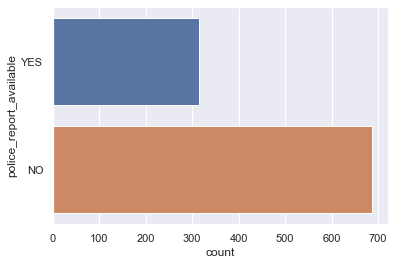

In [63]:
sns.countplot(y="police_report_available",data=df)

Observations from the plot:

In most of the cases the police report is not available 

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

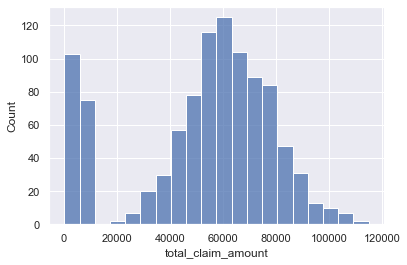

In [64]:
sns.histplot(x="total_claim_amount",data=df)

Observations from plot:

On an average for an individual the total claim amount is ~ 52761

Maximum total claim amount is ~ 114920

In [65]:
df['fraud_reported'] = df['fraud_reported'].apply(lambda x: 1 if x == 'Y' else 0)

- if "fraud_reported" = "Yes" then 1

- if "fraud_reported" = "No" then 0

In [66]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [67]:
fraud_Y = df[df['fraud_reported'] == 1]
fraud_N = df[df['fraud_reported'] == 0]

In [68]:
fraud_Y.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Month,policy_bind_Day,policy_csl_PP,policy_csl_PA,incident_date_Month,incident_date_Day
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1,10,17,250,500,1,25
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,No Collusion,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,1,6,27,250,500,1,21
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,5,25,250,500,10,1
5,256,39,104594,OH,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,1,12,10,250,500,2,1
14,180,38,644081,OH,2000,1301.13,0,476685,FEMALE,College,machine-op-inspct,board-games,not-in-family,41300,-55500,Single Vehicle Collision,Rear Collision,Total Loss,Police,SC,Springfield,6851 3rd Drive,12,1,NO,0,2,YES,46200,4200,8400,33600,Dodge,Neon,2003,1,12,28,250,500,1,15


In [69]:
fraud_N.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Month,policy_bind_Day,policy_csl_PP,policy_csl_PA,incident_date_Month,incident_date_Day
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,6,9,100,300,2,22
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,No Collusion,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0,6,6,500,1000,2,17
6,137,34,413978,IN,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,NO,0,0,NO,78650,21450,7150,50050,Nissan,Pathfinder,2012,0,4,6,250,500,1,13
7,165,37,429027,IL,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,NO,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,0,3,2,100,300,2,27
8,27,33,485665,IL,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,0,5,2,100,300,1,30


In [70]:
print("Total =", len(df))
print("\n")
print("Number of customeres involved in Fraud =", len(fraud_Y))
print("\n")
print("Percentage of customeres involved in Fraud =", 1.*len(fraud_Y)/len(df)*100.0, "%")
print("\n")
print("Number of customeres not involved in Fraud =", len(fraud_N))
print("\n")
print("Percentage of customeres not involved in Fraud =", 1.*len(fraud_N)/len(df)*100.0, "%")

Total = 1000


Number of customeres involved in Fraud = 247


Percentage of customeres involved in Fraud = 24.7 %


Number of customeres not involved in Fraud = 753


Percentage of customeres not involved in Fraud = 75.3 %


<AxesSubplot:xlabel='policy_state', ylabel='age'>

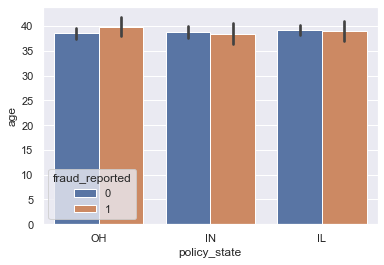

In [71]:
sns.barplot(x="policy_state",hue="fraud_reported",y="age",data=df)

Observations from Plot:

We can clearly state that the individuals whose policy state is (OH) have  a high tendency of them being involved in fraud situations  

<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

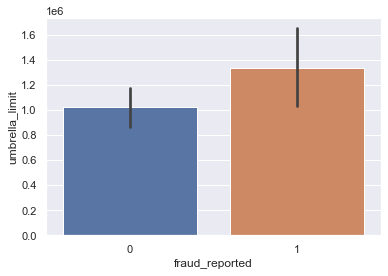

In [72]:
sns.barplot(x="fraud_reported",y="umbrella_limit",data=df)

Observations from the plot:

umbrella limit is the Additional coverage to the existing policy

Individuals who are involved in fraud are having a higher Umbrella limit

<AxesSubplot:xlabel='count', ylabel='insured_education_level'>

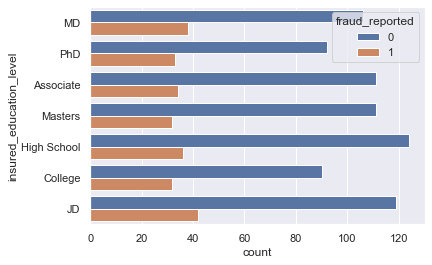

In [73]:
sns.countplot(hue="fraud_reported",y="insured_education_level",data=df)

Observations from the plot:

Indivisuals with Education Level "JD" tend to have  the highest fraud levels

<AxesSubplot:xlabel='count', ylabel='insured_occupation'>

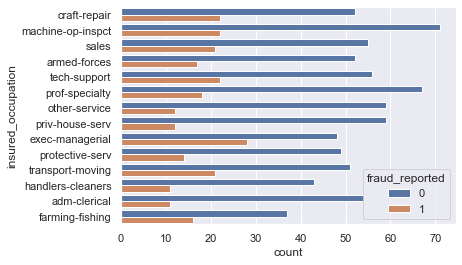

In [74]:
sns.countplot(hue="fraud_reported",y="insured_occupation",data=df)

Observations from the plot:
    
The occupation Exec Managerial is showing high fraud levels as compared to other occupations

<AxesSubplot:xlabel='count', ylabel='incident_city'>

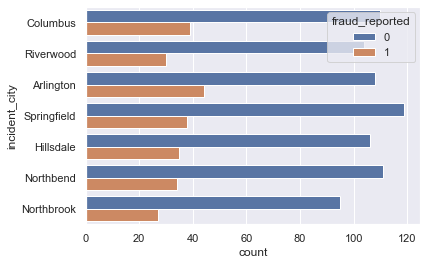

In [75]:
sns.countplot(hue="fraud_reported",y="incident_city",data=df)

Observations from the plot:
    
High fraud levels for the individuals who are from the city of Arlington as compared to any other cities

<AxesSubplot:xlabel='count', ylabel='auto_make'>

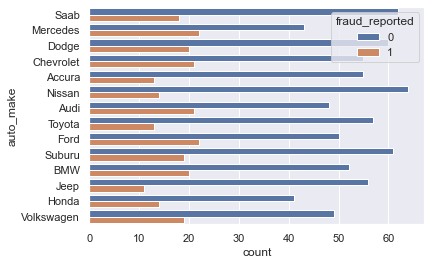

In [76]:
sns.countplot(hue="fraud_reported",y="auto_make",data=df)

Observations from the plot:

High fraud levels are recorded for the individuals who own either Ford or Mercedes

Text(0.5, 0, 'Age of customer')

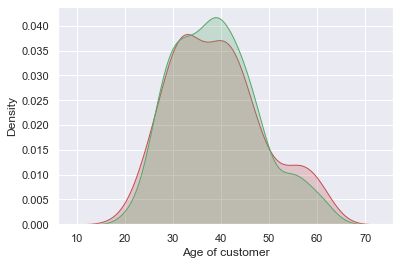

In [77]:
sns.kdeplot(fraud_Y['age'], label = 'Customers who committed fraud', shade = True, color = 'r')
sns.kdeplot(fraud_N['age'], label = 'Customers who did not commit fraud', shade = True, color = 'g')

plt.xlabel('Age of customer')

Observations from the plot:

We can clearly see that some individuals after the age of 50 are involved in some kind of fraud

Text(0.5, 0, 'total claim amount')

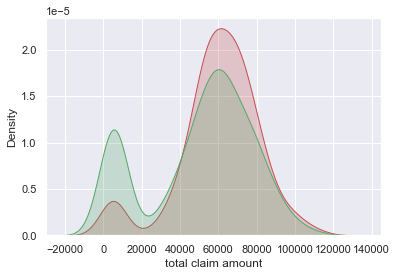

In [78]:
sns.kdeplot(fraud_Y['total_claim_amount'], label = 'Customers who committed fraud', shade = True, color = 'r')
sns.kdeplot(fraud_N['total_claim_amount'], label = 'Customers who did not commit fraud', shade = True, color = 'g')

plt.xlabel('total claim amount')

observations from the plot:

We can observe that the individual with total claim amount between range(40000 - 100000) are having high fraud levels

## Data Cleaning

In [79]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

No missing values

In [80]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Month,policy_bind_Day,policy_csl_PP,policy_csl_PA,incident_date_Month,incident_date_Day
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1,10,17,250,500,1,25
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,No Collusion,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,1,6,27,250,500,1,21
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,6,9,100,300,2,22
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,5,25,250,500,10,1
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,No Collusion,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0,6,6,500,1000,2,17


In [81]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries          

Conerting "policy_csl_PP" and "policy_csl_PA" to int datatype

In [82]:
df["policy_csl_PP"] =  df["policy_csl_PP"].astype(int)

In [83]:
df["policy_csl_PA"] =  df["policy_csl_PA"].astype(int)

## Outliers

Creating different datasets for categorical and continuous variables

In [84]:
df_continuous = df[["months_as_customer","age","policy_number","policy_deductable","policy_annual_premium","umbrella_limit","insured_zip","capital-gains","capital-loss","incident_hour_of_the_day","number_of_vehicles_involved","bodily_injuries","witnesses","total_claim_amount","injury_claim","property_claim","vehicle_claim","auto_year",'policy_bind_Month',
       'policy_bind_Day', 'policy_csl_PP', 'policy_csl_PA',
       'incident_date_Month', 'incident_date_Day']]                                                                                                                                                                                                                 

In [85]:
df_continuous.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_Month,policy_bind_Day,policy_csl_PP,policy_csl_PA,incident_date_Month,incident_date_Day
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,10,17,250,500,1,25
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,6,27,250,500,1,21
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,6,9,100,300,2,22
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,5,25,250,500,10,1
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,6,6,500,1000,2,17


In [86]:
df_categorical = df.drop(["months_as_customer","age","policy_number","policy_deductable","policy_annual_premium","umbrella_limit","insured_zip","capital-gains","capital-loss","incident_hour_of_the_day","number_of_vehicles_involved","bodily_injuries","witnesses","total_claim_amount","injury_claim","property_claim","vehicle_claim","auto_year",'policy_bind_Month',
       'policy_bind_Day', 'policy_csl_PP', 'policy_csl_PA',
       'incident_date_Month', 'incident_date_Day'],axis=1)

In [87]:
df_categorical.head()

,policy_state,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,1
1,IN,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,No Collusion,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NO,NO,Mercedes,E400,1
2,OH,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,0
3,IL,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,NO,NO,Chevrolet,Tahoe,1
4,IL,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,No Collusion,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,0


In [88]:
df_categorical.shape

(1000, 18)

### Checking outliers in continuous variables

In [89]:
from scipy import stats

# creating function to count outliers

def outliers(cname):
    Q1 = df[cname].quantile(0.25)
    Q3 = df[cname].quantile(0.75)
    IQR = stats.iqr(df[cname])
    print('The first quartile :',Q1,'for',cname)
    print('The third quartile :',Q3,'for',cname)
    print('The IQR :', IQR,'for',cname)
    
    L_outlier = Q1 - 1.5*(Q3 - Q1)  
    U_outlier = Q3 + 1.5*(Q3 - Q1)

    print('The left outlier :',L_outlier,'for',cname)
    print('The Right outlier :',U_outlier,'for',cname)
    
    print("Left Outliers :",df[df[cname] < L_outlier][cname].count())
    print("Right Outliers :",df[df[cname] > U_outlier][cname].count())

The first quartile : 115.75 for months_as_customer
The third quartile : 276.25 for months_as_customer
The IQR : 160.5 for months_as_customer
The left outlier : -125.0 for months_as_customer
The Right outlier : 517.0 for months_as_customer
Left Outliers : 0
Right Outliers : 0


<AxesSubplot:xlabel='months_as_customer'>

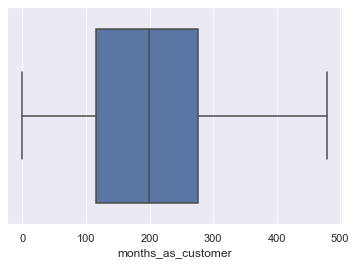

In [90]:
outliers("months_as_customer")
sns.boxplot(x="months_as_customer",data=df)

No outliers in months as customers

The first quartile : 32.0 for age
The third quartile : 44.0 for age
The IQR : 12.0 for age
The left outlier : 14.0 for age
The Right outlier : 62.0 for age
Left Outliers : 0
Right Outliers : 4


<AxesSubplot:xlabel='age'>

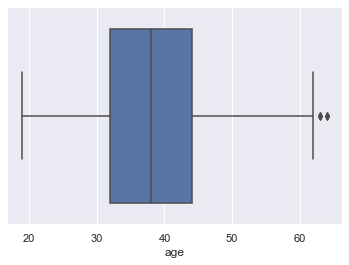

In [91]:
outliers("age")
sns.boxplot(x="age",data=df)

Some outliers in age

The first quartile : 335980.25 for policy_number
The third quartile : 759099.75 for policy_number
The IQR : 423119.5 for policy_number
The left outlier : -298699.0 for policy_number
The Right outlier : 1393779.0 for policy_number
Left Outliers : 0
Right Outliers : 0


<AxesSubplot:xlabel='policy_number'>

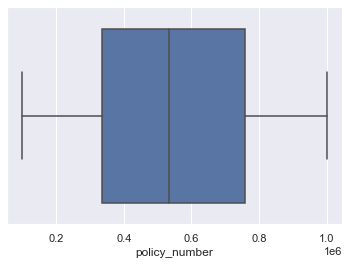

In [92]:
outliers("policy_number")
sns.boxplot(x="policy_number",data=df)

No outliers in policy number

The first quartile : 500.0 for policy_deductable
The third quartile : 2000.0 for policy_deductable
The IQR : 1500.0 for policy_deductable
The left outlier : -1750.0 for policy_deductable
The Right outlier : 4250.0 for policy_deductable
Left Outliers : 0
Right Outliers : 0


<AxesSubplot:xlabel='policy_deductable'>

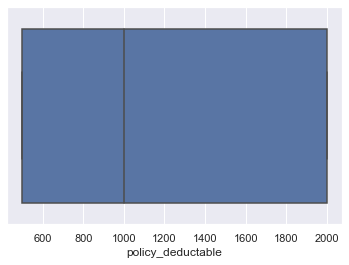

In [93]:
outliers("policy_deductable")
sns.boxplot(x="policy_deductable",data=df)

No outliers in policy deductable

The first quartile : 1089.6075 for policy_annual_premium
The third quartile : 1415.695 for policy_annual_premium
The IQR : 326.08749999999986 for policy_annual_premium
The left outlier : 600.4762500000003 for policy_annual_premium
The Right outlier : 1904.8262499999996 for policy_annual_premium
Left Outliers : 4
Right Outliers : 5


<AxesSubplot:xlabel='policy_annual_premium'>

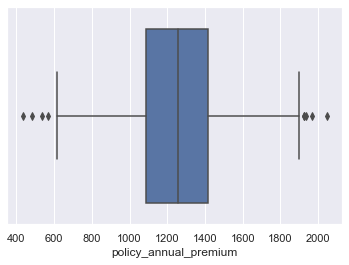

In [94]:
outliers("policy_annual_premium")
sns.boxplot(x="policy_annual_premium",data=df)

The first quartile : 0.0 for umbrella_limit
The third quartile : 0.0 for umbrella_limit
The IQR : 0.0 for umbrella_limit
The left outlier : 0.0 for umbrella_limit
The Right outlier : 0.0 for umbrella_limit
Left Outliers : 1
Right Outliers : 201


<AxesSubplot:xlabel='umbrella_limit'>

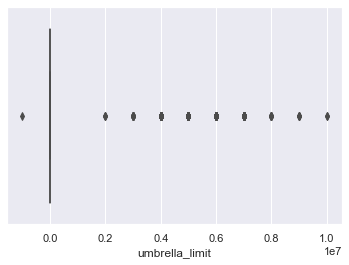

In [95]:
outliers("umbrella_limit")
sns.boxplot(x="umbrella_limit",data=df)

Some outliers in umbrella_limit

The first quartile : 448404.5 for insured_zip
The third quartile : 603251.0 for insured_zip
The IQR : 154846.5 for insured_zip
The left outlier : 216134.75 for insured_zip
The Right outlier : 835520.75 for insured_zip
Left Outliers : 0
Right Outliers : 0


<AxesSubplot:xlabel='insured_zip'>

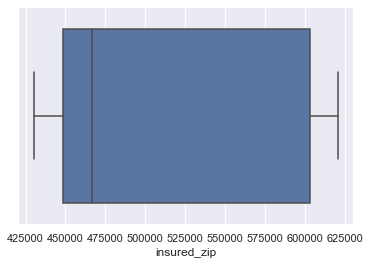

In [96]:
outliers("insured_zip")
sns.boxplot(x="insured_zip",data=df)

No outliers in insured_zip

The first quartile : 0.0 for capital-gains
The third quartile : 51025.0 for capital-gains
The IQR : 51025.0 for capital-gains
The left outlier : -76537.5 for capital-gains
The Right outlier : 127562.5 for capital-gains
Left Outliers : 0
Right Outliers : 0


<AxesSubplot:xlabel='capital-gains'>

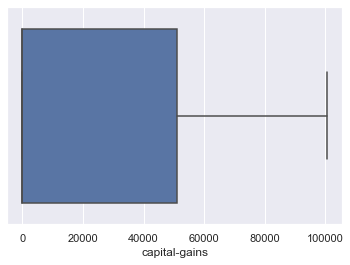

In [97]:
outliers("capital-gains")
sns.boxplot(x="capital-gains",data=df)

No outliers in capital-gains

The first quartile : -51500.0 for capital-loss
The third quartile : 0.0 for capital-loss
The IQR : 51500.0 for capital-loss
The left outlier : -128750.0 for capital-loss
The Right outlier : 77250.0 for capital-loss
Left Outliers : 0
Right Outliers : 0


<AxesSubplot:xlabel='capital-loss'>

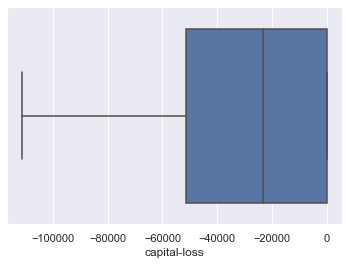

In [98]:
outliers("capital-loss")
sns.boxplot(x="capital-loss",data=df)

No outliers in capital-loss

The first quartile : 6.0 for incident_hour_of_the_day
The third quartile : 17.0 for incident_hour_of_the_day
The IQR : 11.0 for incident_hour_of_the_day
The left outlier : -10.5 for incident_hour_of_the_day
The Right outlier : 33.5 for incident_hour_of_the_day
Left Outliers : 0
Right Outliers : 0


<AxesSubplot:xlabel='incident_hour_of_the_day'>

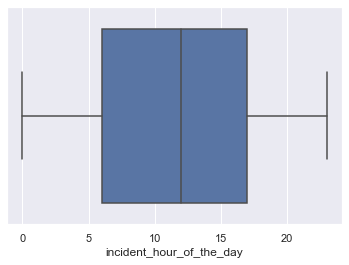

In [99]:
outliers("incident_hour_of_the_day")
sns.boxplot(x="incident_hour_of_the_day",data=df)

No outliers in incident_hour_of_the_day

The first quartile : 1.0 for number_of_vehicles_involved
The third quartile : 3.0 for number_of_vehicles_involved
The IQR : 2.0 for number_of_vehicles_involved
The left outlier : -2.0 for number_of_vehicles_involved
The Right outlier : 6.0 for number_of_vehicles_involved
Left Outliers : 0
Right Outliers : 0


<AxesSubplot:xlabel='number_of_vehicles_involved'>

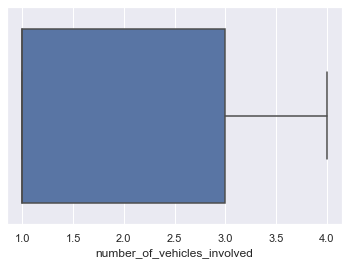

In [100]:
outliers("number_of_vehicles_involved")
sns.boxplot(x="number_of_vehicles_involved",data=df)

No outliers in number_of_vehicles_involved

The first quartile : 0.0 for bodily_injuries
The third quartile : 2.0 for bodily_injuries
The IQR : 2.0 for bodily_injuries
The left outlier : -3.0 for bodily_injuries
The Right outlier : 5.0 for bodily_injuries
Left Outliers : 0
Right Outliers : 0


<AxesSubplot:xlabel='bodily_injuries'>

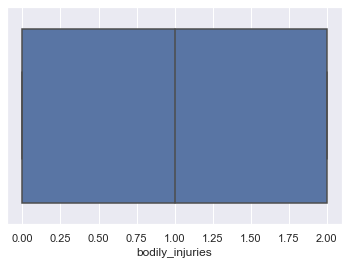

In [101]:
outliers("bodily_injuries")
sns.boxplot(x="bodily_injuries",data=df)

No outliers in bodily_injuries

The first quartile : 1.0 for witnesses
The third quartile : 2.0 for witnesses
The IQR : 1.0 for witnesses
The left outlier : -0.5 for witnesses
The Right outlier : 3.5 for witnesses
Left Outliers : 0
Right Outliers : 0


<AxesSubplot:xlabel='witnesses'>

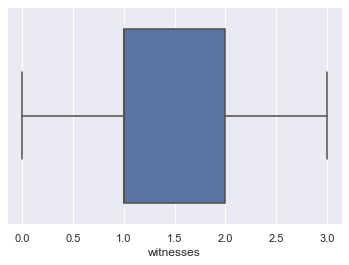

In [102]:
outliers("witnesses")
sns.boxplot(x="witnesses",data=df)

No outliers in witnesses

The first quartile : 41812.5 for total_claim_amount
The third quartile : 70592.5 for total_claim_amount
The IQR : 28780.0 for total_claim_amount
The left outlier : -1357.5 for total_claim_amount
The Right outlier : 113762.5 for total_claim_amount
Left Outliers : 0
Right Outliers : 1


<AxesSubplot:xlabel='total_claim_amount'>

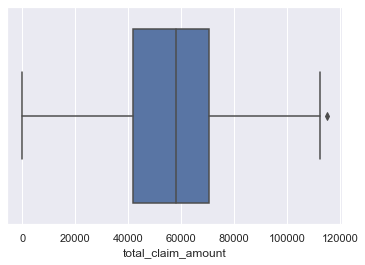

In [103]:
outliers("total_claim_amount")
sns.boxplot(x="total_claim_amount",data=df)

Some outlier in total_claim_amount

The first quartile : 4295.0 for injury_claim
The third quartile : 11305.0 for injury_claim
The IQR : 7010.0 for injury_claim
The left outlier : -6220.0 for injury_claim
The Right outlier : 21820.0 for injury_claim
Left Outliers : 0
Right Outliers : 0


<AxesSubplot:xlabel='injury_claim'>

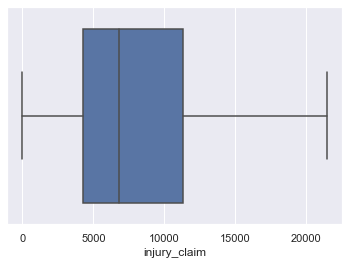

In [104]:
outliers("injury_claim")
sns.boxplot(x="injury_claim",data=df)

No outliers in injury_claim

The first quartile : 4445.0 for property_claim
The third quartile : 10885.0 for property_claim
The IQR : 6440.0 for property_claim
The left outlier : -5215.0 for property_claim
The Right outlier : 20545.0 for property_claim
Left Outliers : 0
Right Outliers : 6


<AxesSubplot:xlabel='property_claim'>

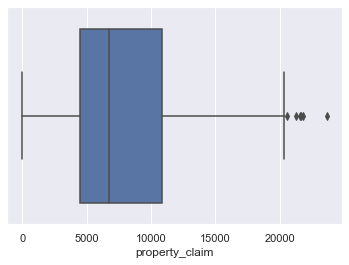

In [105]:
outliers("property_claim")
sns.boxplot(x="property_claim",data=df)

Some outliers in property_claim

The first quartile : 30292.5 for vehicle_claim
The third quartile : 50822.5 for vehicle_claim
The IQR : 20530.0 for vehicle_claim
The left outlier : -502.5 for vehicle_claim
The Right outlier : 81617.5 for vehicle_claim
Left Outliers : 0
Right Outliers : 0


<AxesSubplot:xlabel='vehicle_claim'>

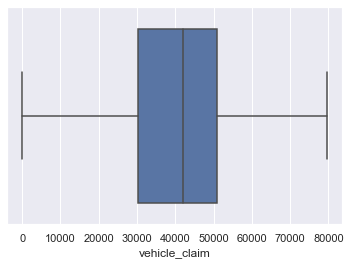

In [106]:
outliers("vehicle_claim")
sns.boxplot(x="vehicle_claim",data=df)

No outliers in vehicle_claim

The first quartile : 2000.0 for auto_year
The third quartile : 2010.0 for auto_year
The IQR : 10.0 for auto_year
The left outlier : 1985.0 for auto_year
The Right outlier : 2025.0 for auto_year
Left Outliers : 0
Right Outliers : 0


<AxesSubplot:xlabel='auto_year'>

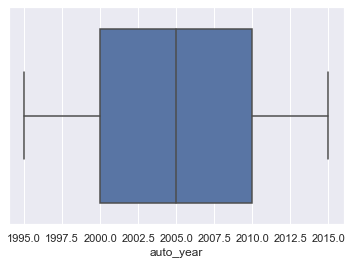

In [107]:
outliers("auto_year")
sns.boxplot(x="auto_year",data=df)

No outliers in auto_year

The first quartile : 4.0 for policy_bind_Month
The third quartile : 9.0 for policy_bind_Month
The IQR : 5.0 for policy_bind_Month
The left outlier : -3.5 for policy_bind_Month
The Right outlier : 16.5 for policy_bind_Month
Left Outliers : 0
Right Outliers : 0


<AxesSubplot:xlabel='policy_bind_Month'>

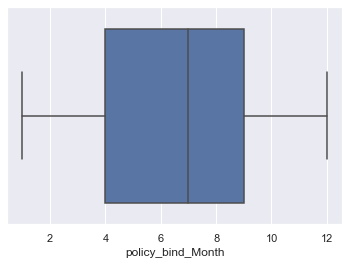

In [108]:
outliers("policy_bind_Month")
sns.boxplot(x="policy_bind_Month",data=df)

No outliers in policy_bind_Month

The first quartile : 8.0 for policy_bind_Day
The third quartile : 23.0 for policy_bind_Day
The IQR : 15.0 for policy_bind_Day
The left outlier : -14.5 for policy_bind_Day
The Right outlier : 45.5 for policy_bind_Day
Left Outliers : 0
Right Outliers : 0


<AxesSubplot:xlabel='policy_bind_Day'>

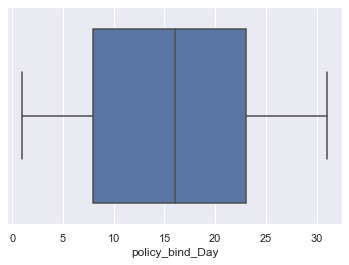

In [109]:
outliers("policy_bind_Day")
sns.boxplot(x="policy_bind_Day",data=df)

No outliers in policy_bind_Day

The first quartile : 100.0 for policy_csl_PP
The third quartile : 500.0 for policy_csl_PP
The IQR : 400.0 for policy_csl_PP
The left outlier : -500.0 for policy_csl_PP
The Right outlier : 1100.0 for policy_csl_PP
Left Outliers : 0
Right Outliers : 0


<AxesSubplot:xlabel='policy_csl_PP'>

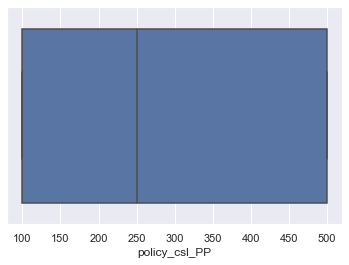

In [110]:
outliers("policy_csl_PP")
sns.boxplot(x="policy_csl_PP",data=df)

No outliers in policy_csl_PP

The first quartile : 300.0 for policy_csl_PA
The third quartile : 1000.0 for policy_csl_PA
The IQR : 700.0 for policy_csl_PA
The left outlier : -750.0 for policy_csl_PA
The Right outlier : 2050.0 for policy_csl_PA
Left Outliers : 0
Right Outliers : 0


<AxesSubplot:xlabel='policy_csl_PA'>

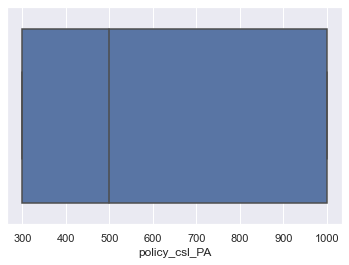

In [111]:
outliers("policy_csl_PA")
sns.boxplot(x="policy_csl_PA",data=df)

No outliers in policy_csl_PA

The first quartile : 1.0 for incident_date_Month
The third quartile : 5.0 for incident_date_Month
The IQR : 4.0 for incident_date_Month
The left outlier : -5.0 for incident_date_Month
The Right outlier : 11.0 for incident_date_Month
Left Outliers : 0
Right Outliers : 39


<AxesSubplot:xlabel='incident_date_Month'>

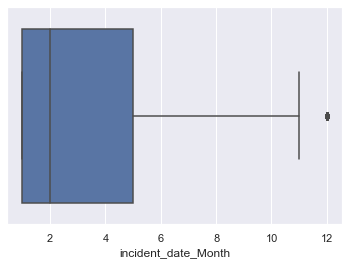

In [112]:
outliers("incident_date_Month")
sns.boxplot(x="incident_date_Month",data=df)

Some outliers in incident_date_Month

The first quartile : 2.0 for incident_date_Day
The third quartile : 22.0 for incident_date_Day
The IQR : 20.0 for incident_date_Day
The left outlier : -28.0 for incident_date_Day
The Right outlier : 52.0 for incident_date_Day
Left Outliers : 0
Right Outliers : 0


<AxesSubplot:xlabel='incident_date_Day'>

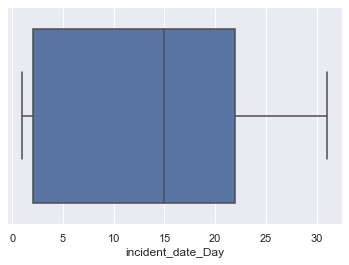

In [113]:
outliers("incident_date_Day")
sns.boxplot(x="incident_date_Day",data=df)

No outliers in incident_date_Day

## Removing Outliers

#### Z score technique

In [114]:
from scipy.stats import zscore

In [115]:
z = np.abs(zscore(df_continuous))

In [116]:
z.shape

(1000, 24)

In [117]:
threshhold = 3
print(np.where(z > 3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5, 15,  5,  5,  5,  4,  8,
        5,  5,  5], dtype=int64))


In [118]:
df_new = df[(z < 3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1000, 42)
(980, 42)


### Percentage data loss 

In [119]:
loss = (1000-980)/1000*100

In [120]:
print("The data loss is ",loss," %")

The data loss is  2.0  %


### After removing the outliers there is only 2% data loss we can go ahead with that

## Checking Skewness of data

In [121]:
df_continuous = df_new[["months_as_customer","age","policy_number","policy_deductable","policy_annual_premium","umbrella_limit","insured_zip","capital-gains","capital-loss","incident_hour_of_the_day","number_of_vehicles_involved","bodily_injuries","witnesses","total_claim_amount","injury_claim","property_claim","vehicle_claim","auto_year",'policy_bind_Month',
       'policy_bind_Day', 'policy_csl_PP', 'policy_csl_PA',
       'incident_date_Month', 'incident_date_Day']]                                                                                                                                                                                                                 

In [122]:
df_continuous.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_Month,policy_bind_Day,policy_csl_PP,policy_csl_PA,incident_date_Month,incident_date_Day
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,10,17,250,500,1,25
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,6,27,250,500,1,21
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,6,9,100,300,2,22
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,5,25,250,500,10,1
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,6,6,500,1000,2,17


In [123]:
df_categorical = df_new.drop(["months_as_customer","age","policy_number","policy_deductable","policy_annual_premium","umbrella_limit","insured_zip","capital-gains","capital-loss","incident_hour_of_the_day","number_of_vehicles_involved","bodily_injuries","witnesses","total_claim_amount","injury_claim","property_claim","vehicle_claim","auto_year",'policy_bind_Month',
       'policy_bind_Day', 'policy_csl_PP', 'policy_csl_PA',
       'incident_date_Month', 'incident_date_Day'],axis=1)

In [124]:
df_categorical.head()

,policy_state,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,1
1,IN,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,No Collusion,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NO,NO,Mercedes,E400,1
2,OH,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,0
3,IL,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,NO,NO,Chevrolet,Tahoe,1
4,IL,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,No Collusion,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,0


In [125]:
df_continuous.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
auto_year                     -0.054522
policy_bind_Month             -0.024643
policy_bind_Day                0.028152
policy_csl_PP                  0.418968
policy_csl_PA                  0.614882
incident_date_Month            1.388336
incident_date_Day              0.055443
dtype: float64

Taking skewness range between (-65,+65)

## Log Transform

In [126]:
df_continuous["umbrella_limit"] = np.log(df_continuous["umbrella_limit"] + 1)

In [127]:
df_continuous["umbrella_limit"].skew()

1.5842719241022423

In [128]:
df_continuous["insured_zip"] = np.log(df_continuous["insured_zip"] + 1)

In [129]:
df_continuous["insured_zip"].skew()

0.8025533498634145

Some skewness has been reduced

## Encoding

In [130]:
df_categorical.head()

,policy_state,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,1
1,IN,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,No Collusion,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NO,NO,Mercedes,E400,1
2,OH,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,0
3,IL,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,NO,NO,Chevrolet,Tahoe,1
4,IL,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,No Collusion,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,0


In [131]:
df_categorical = df_categorical.drop("incident_location",axis=1)

In [132]:
df_categorical.head()

,policy_state,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,1
1,IN,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,No Collusion,Minor Damage,Police,VA,Riverwood,NO,NO,Mercedes,E400,1
2,OH,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,0
3,IL,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,NO,NO,Chevrolet,Tahoe,1
4,IL,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,No Collusion,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,0


#### Applying one hot encoding to categorical variables

In [133]:
df_continuous.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_Month,policy_bind_Day,policy_csl_PP,policy_csl_PA,incident_date_Month,incident_date_Day
0,328,48,521585,1000,1406.91,0.000000,13.052226,53300,0,5,1,1,2,71610,6510,13020,52080,2004,10,17,250,500,1,25
1,228,42,342868,2000,1197.22,15.424949,13.056602,0,0,8,1,0,0,5070,780,780,3510,2007,6,27,250,500,1,21
2,134,29,687698,2000,1413.14,15.424949,12.973011,35100,0,7,3,2,3,34650,7700,3850,23100,2007,6,9,100,300,2,22
3,256,41,227811,2000,1415.74,15.607270,13.318124,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,5,25,250,500,10,1
4,228,44,367455,1000,1583.91,15.607270,13.322373,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,6,6,500,1000,2,17


In [134]:
df_continuous["umbrella_limit"].describe()

count    979.000000
mean       2.933206
std        6.060684
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       15.761421
Name: umbrella_limit, dtype: float64

In [135]:
df_continuous["umbrella_limit"].median()

0.0

In [136]:
df_continuous["umbrella_limit"] = df_continuous["umbrella_limit"].replace(np.nan,0.0)

In [137]:
df_categorical = pd.get_dummies(df_categorical,drop_first=True)

In [138]:
df_categorical.head()

,fraud_reported,policy_state_IN,policy_state_OH,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_No Collusion,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_YES,police_report_available_YES,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0

In [139]:
df_categorical.shape

(980, 125)

In [140]:
df = pd.concat([df_continuous,df_categorical],axis=1)

In [141]:
df.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_Month,policy_bind_Day,policy_csl_PP,policy_csl_PA,incident_date_Month,incident_date_Day,fraud_reported,policy_state_IN,policy_state_OH,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_No Collusion,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_YES,police_report_available_YES,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,521585,1000,1406.91,0.000000,13.052226,53300,0,5,1,1,2,71610,6510,13020,52080,2004,10,17,250,500,1,25,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,228,42,342868,2000,1197.22,15.424949,13.056602,0,0,8,1,0,0,5070,780,780,3510,2007,6,27,250,500,1,21,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,134,29,687698,2000,1413.14,15.424

In [142]:
df.shape

(980, 149)

## Correlation

In [161]:
df_cor = df

In [164]:
cor = df_cor.corr()

In [165]:
cor["fraud_reported"].sort_values(ascending=False)

fraud_reported                      1.000000
insured_hobbies_chess               0.299935
insured_hobbies_cross-fit           0.216195
vehicle_claim                       0.170782
total_claim_amount                  0.163969
                                      ...   
incident_severity_Trivial Damage   -0.129074
authorities_contacted_None         -0.130441
collision_type_No Collusion        -0.165251
incident_severity_Total Loss       -0.170835
incident_severity_Minor Damage     -0.237004
Name: fraud_reported, Length: 149, dtype: float64

## Train Test Split

In [143]:
df.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_Month,policy_bind_Day,policy_csl_PP,policy_csl_PA,incident_date_Month,incident_date_Day,fraud_reported,policy_state_IN,policy_state_OH,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_No Collusion,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_YES,police_report_available_YES,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,521585,1000,1406.91,0.000000,13.052226,53300,0,5,1,1,2,71610,6510,13020,52080,2004,10,17,250,500,1,25,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,228,42,342868,2000,1197.22,15.424949,13.056602,0,0,8,1,0,0,5070,780,780,3510,2007,6,27,250,500,1,21,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,134,29,687698,2000,1413.14,15.424

In [144]:
X = df.drop("fraud_reported",axis=1)
y = df["fraud_reported"]

In [145]:
X.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_Month,policy_bind_Day,policy_csl_PP,policy_csl_PA,incident_date_Month,incident_date_Day,policy_state_IN,policy_state_OH,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_No Collusion,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_YES,police_report_available_YES,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,521585,1000,1406.91,0.000000,13.052226,53300,0,5,1,1,2,71610,6510,13020,52080,2004,10,17,250,500,1,25,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,228,42,342868,2000,1197.22,15.424949,13.056602,0,0,8,1,0,0,5070,780,780,3510,2007,6,27,250,500,1,21,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,134,29,687698,2000,1413.14,15.424949,12.973011,35100

In [146]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [147]:
X = X.values
y = y.values

In [148]:
X

array([[3.28000e+02, 4.80000e+01, 5.21585e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.28000e+02, 4.20000e+01, 3.42868e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.34000e+02, 2.90000e+01, 6.87698e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.30000e+02, 3.40000e+01, 9.18516e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.58000e+02, 6.20000e+01, 5.33940e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.56000e+02, 6.00000e+01, 5.56080e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [149]:
y

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [152]:
X_train.shape

(735, 148)

In [153]:
y_train.shape

(735,)

In [154]:
X_test.shape

(245, 148)

In [155]:
y_test.shape

(245,)

## Scaling

In [156]:
from sklearn.preprocessing import MinMaxScaler

In [157]:
sc = MinMaxScaler()

In [158]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [159]:
X_train

array([[0.8308977 , 0.86666667, 0.46097453, ..., 0.        , 0.        ,
        0.        ],
       [0.34029228, 0.26666667, 0.02949932, ..., 0.        , 0.        ,
        0.        ],
       [0.03966597, 0.22222222, 0.76605859, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29853862, 0.28888889, 0.01231874, ..., 0.        , 0.        ,
        0.        ],
       [0.21503132, 0.31111111, 0.29046961, ..., 0.        , 0.        ,
        0.        ],
       [0.34237996, 0.26666667, 0.28599503, ..., 0.        , 0.        ,
        0.        ]])

In [160]:
X_test

array([[0.06889353, 0.28888889, 0.18066926, ..., 0.        , 0.        ,
        0.        ],
       [0.30688935, 0.4       , 0.47229619, ..., 0.        , 0.        ,
        0.        ],
       [0.60542797, 0.57777778, 0.53677761, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.32359081, 0.35555556, 0.25225482, ..., 0.        , 0.        ,
        0.        ],
       [0.27974948, 0.24444444, 0.82617114, ..., 0.        , 0.        ,
        0.        ],
       [0.28810021, 0.24444444, 0.65458458, ..., 0.        , 0.        ,
        0.        ]])

## Machine Learning

#### Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression

In [167]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [168]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_1 = LogisticRegression() 
    mod_1.fit(X_train,y_train)
    train_score_1 = mod_1.score(X_train,y_train)
    pred_1 = mod_1.predict(X_test)
    test_score_1 = accuracy_score(y_test,pred_1)
    
    print("for random state ",i," The training accuracy is :",train_score_1)
    print("for random state ",i," The testing accuracy is :",test_score_1)
    print("\n")

for random state  0  The training accuracy is : 0.7687074829931972
for random state  0  The testing accuracy is : 0.7224489795918367


for random state  1  The training accuracy is : 0.746938775510204
for random state  1  The testing accuracy is : 0.7877551020408163


for random state  2  The training accuracy is : 0.7659863945578231
for random state  2  The testing accuracy is : 0.7306122448979592


for random state  3  The training accuracy is : 0.7537414965986394
for random state  3  The testing accuracy is : 0.7714285714285715


for random state  4  The training accuracy is : 0.7482993197278912
for random state  4  The testing accuracy is : 0.7795918367346939


for random state  5  The training accuracy is : 0.7605442176870748
for random state  5  The testing accuracy is : 0.746938775510204


for random state  6  The training accuracy is : 0.7496598639455783
for random state  6  The testing accuracy is : 0.7795918367346939


for random state  7  The training accuracy is : 0.7523809

for random state  61  The training accuracy is : 0.7442176870748299
for random state  61  The testing accuracy is : 0.7877551020408163


for random state  62  The training accuracy is : 0.763265306122449
for random state  62  The testing accuracy is : 0.726530612244898


for random state  63  The training accuracy is : 0.746938775510204
for random state  63  The testing accuracy is : 0.7877551020408163


for random state  64  The training accuracy is : 0.7537414965986394
for random state  64  The testing accuracy is : 0.7714285714285715


for random state  65  The training accuracy is : 0.7496598639455783
for random state  65  The testing accuracy is : 0.7755102040816326


for random state  66  The training accuracy is : 0.7510204081632653
for random state  66  The testing accuracy is : 0.7755102040816326


for random state  67  The training accuracy is : 0.7482993197278912
for random state  67  The testing accuracy is : 0.7755102040816326


for random state  68  The training accuracy 

In [169]:
# Taking best random state as 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
mod_1 = LogisticRegression()
mod_1.fit(X_train,y_train)
train_score_1 = mod_1.score(X_train,y_train)
pred_1 = mod_1.predict(X_test)
test_score_1 = accuracy_score(y_test,pred_1)
    
print("The training accuracy is :",train_score_1)
print("The testing accuracy is :",test_score_1)

The training accuracy is : 0.7605442176870748
The testing accuracy is : 0.746938775510204


In [170]:
print(confusion_matrix(y_test,pred_1))
print("\n")
print(classification_report(y_test,pred_1))
print("\n")

[[182   2]
 [ 60   1]]


              precision    recall  f1-score   support

           0       0.75      0.99      0.85       184
           1       0.33      0.02      0.03        61

    accuracy                           0.75       245
   macro avg       0.54      0.50      0.44       245
weighted avg       0.65      0.75      0.65       245





## Stratified Validation

In [171]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [172]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_1,X,y,cv=kfold)

kfold_accuracy_LR = np.mean(abs(K_results))

In [173]:
kfold_accuracy_LR

0.7561224489795917

In [174]:
score = {"Algorithm":["Logistic Regression"],
         "Training_Acc":[train_score_1],
        "Accuracy":[test_score_1],
        "Cross_validation":[kfold_accuracy_LR]}

final_card = pd.DataFrame(score)

In [175]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.760544,0.746939,0.756122


## Naive Bayes

In [176]:
from sklearn.naive_bayes import GaussianNB

In [177]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_2 = GaussianNB() 
    mod_2.fit(X_train,y_train)
    train_score_2 = mod_2.score(X_train,y_train)
    pred_2 = mod_2.predict(X_test)
    test_score_2 = accuracy_score(y_test,pred_2)
    
    print("for random state ",i," The training accuracy is :",train_score_2)
    print("for random state ",i," The testing accuracy is :",test_score_2)
    print("\n")

for random state  0  The training accuracy is : 0.691156462585034
for random state  0  The testing accuracy is : 0.6489795918367347


for random state  1  The training accuracy is : 0.6585034013605442
for random state  1  The testing accuracy is : 0.7224489795918367


for random state  2  The training accuracy is : 0.710204081632653
for random state  2  The testing accuracy is : 0.6653061224489796


for random state  3  The training accuracy is : 0.7006802721088435
for random state  3  The testing accuracy is : 0.6408163265306123


for random state  4  The training accuracy is : 0.6829931972789116
for random state  4  The testing accuracy is : 0.6979591836734694


for random state  5  The training accuracy is : 0.6489795918367347
for random state  5  The testing accuracy is : 0.6244897959183674


for random state  6  The training accuracy is : 0.691156462585034
for random state  6  The testing accuracy is : 0.6326530612244898


for random state  7  The training accuracy is : 0.69523809

for random state  71  The training accuracy is : 0.7251700680272108
for random state  71  The testing accuracy is : 0.689795918367347


for random state  72  The training accuracy is : 0.7129251700680272
for random state  72  The testing accuracy is : 0.6489795918367347


for random state  73  The training accuracy is : 0.6857142857142857
for random state  73  The testing accuracy is : 0.6448979591836734


for random state  74  The training accuracy is : 0.7156462585034014
for random state  74  The testing accuracy is : 0.746938775510204


for random state  75  The training accuracy is : 0.7115646258503401
for random state  75  The testing accuracy is : 0.763265306122449


for random state  76  The training accuracy is : 0.6666666666666666
for random state  76  The testing accuracy is : 0.5959183673469388


for random state  77  The training accuracy is : 0.7061224489795919
for random state  77  The testing accuracy is : 0.6653061224489796


for random state  78  The training accuracy 

In [178]:
# Taking the best random state as 22
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)
mod_2 = GaussianNB() 
mod_2.fit(X_train,y_train)
train_score_2 = mod_2.score(X_train,y_train)
pred_2 = mod_2.predict(X_test)
test_score_2 = accuracy_score(y_test,pred_2)
    
print("The training accuracy is :",train_score_2)
print("The testing accuracy is :",test_score_2)
print("\n")

The training accuracy is : 0.7129251700680272
The testing accuracy is : 0.7061224489795919




In [179]:
print(confusion_matrix(y_test,pred_2))
print("\n")
print(classification_report(y_test,pred_2))
print("\n")

[[162  24]
 [ 48  11]]


              precision    recall  f1-score   support

           0       0.77      0.87      0.82       186
           1       0.31      0.19      0.23        59

    accuracy                           0.71       245
   macro avg       0.54      0.53      0.53       245
weighted avg       0.66      0.71      0.68       245





## Stratified Crossvalidation

In [180]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_2,X,y,cv=kfold)

kfold_accuracy_NB = np.mean(abs(K_results))

In [181]:
kfold_accuracy_NB

0.6683673469387756

In [182]:
score = {"Algorithm":["Logistic Regression","Naive Bayes"],
         "Training_Acc":[train_score_1,train_score_2],
        "Accuracy":[test_score_1,test_score_2],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB]}

final_card = pd.DataFrame(score)

In [183]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.760544,0.746939,0.756122
1,Naive Bayes,0.712925,0.706122,0.668367


##  Random_forest_classification

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [185]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    mod_3 = RandomForestClassifier() 
    mod_3.fit(X_train,y_train)
    train_score_3 = mod_3.score(X_train,y_train)
    pred_3 = mod_3.predict(X_test)
    test_score_3 = accuracy_score(y_test,pred_3)
    
    print("for random state ",i," The training accuracy is :",train_score_3)
    print("for random state ",i," The testing accuracy is :",test_score_3)
    print("\n")

for random state  0  The training accuracy is : 1.0
for random state  0  The testing accuracy is : 0.717687074829932


for random state  1  The training accuracy is : 1.0
for random state  1  The testing accuracy is : 0.7993197278911565


for random state  2  The training accuracy is : 1.0
for random state  2  The testing accuracy is : 0.7585034013605442


for random state  3  The training accuracy is : 1.0
for random state  3  The testing accuracy is : 0.7857142857142857


for random state  4  The training accuracy is : 1.0
for random state  4  The testing accuracy is : 0.7857142857142857


for random state  5  The training accuracy is : 1.0
for random state  5  The testing accuracy is : 0.7721088435374149


for random state  6  The training accuracy is : 1.0
for random state  6  The testing accuracy is : 0.7721088435374149


for random state  7  The training accuracy is : 1.0
for random state  7  The testing accuracy is : 0.7857142857142857


for random state  8  The training accurac

for random state  68  The training accuracy is : 1.0
for random state  68  The testing accuracy is : 0.826530612244898


for random state  69  The training accuracy is : 1.0
for random state  69  The testing accuracy is : 0.8027210884353742


for random state  70  The training accuracy is : 1.0
for random state  70  The testing accuracy is : 0.7653061224489796


for random state  71  The training accuracy is : 1.0
for random state  71  The testing accuracy is : 0.7585034013605442


for random state  72  The training accuracy is : 1.0
for random state  72  The testing accuracy is : 0.7585034013605442


for random state  73  The training accuracy is : 1.0
for random state  73  The testing accuracy is : 0.7755102040816326


for random state  74  The training accuracy is : 1.0
for random state  74  The testing accuracy is : 0.7789115646258503


for random state  75  The training accuracy is : 1.0
for random state  75  The testing accuracy is : 0.7653061224489796


for random state  76  The

In [186]:
# Taking the best random state as 8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)
mod_3 = RandomForestClassifier() 
mod_3.fit(X_train,y_train)
train_score_3 = mod_3.score(X_train,y_train)
pred_3 = mod_3.predict(X_test)
test_score_3 = accuracy_score(y_test,pred_3)
    
print("for random state ",i," The training accuracy is :",train_score_3)
print("for random state ",i," The testing accuracy is :",test_score_3)
print("\n")

for random state  100  The training accuracy is : 1.0
for random state  100  The testing accuracy is : 0.8081632653061225




In [187]:
print(confusion_matrix(y_test,pred_3))
print("\n")
print(classification_report(y_test,pred_3))
print("\n")

[[190   1]
 [ 46   8]]


              precision    recall  f1-score   support

           0       0.81      0.99      0.89       191
           1       0.89      0.15      0.25        54

    accuracy                           0.81       245
   macro avg       0.85      0.57      0.57       245
weighted avg       0.82      0.81      0.75       245





## Stratified Cross Validation

In [188]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_3,X,y,cv=kfold)

kfold_accuracy_RFR = np.mean(abs(K_results))

In [189]:
kfold_accuracy_RFR

0.7622448979591836

In [190]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3],
        "Accuracy":[test_score_1,test_score_2,test_score_3],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR]}

final_card = pd.DataFrame(score)

In [191]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.760544,0.746939,0.756122
1,Naive Bayes,0.712925,0.706122,0.668367
2,Random Forest Classi,1.000000,0.808163,0.762245


##  Decision Tree

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [193]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_4 = DecisionTreeClassifier() 
    mod_4.fit(X_train,y_train)
    train_score_4 = mod_4.score(X_train,y_train)
    pred_4 = mod_4.predict(X_test)
    test_score_4 = accuracy_score(y_test,pred_4)
    
    print("for random state ",i," The training accuracy is :",train_score_4)
    print("for random state ",i," The testing accuracy is :",test_score_4)
    print("\n")

for random state  0  The training accuracy is : 1.0
for random state  0  The testing accuracy is : 0.8326530612244898


for random state  1  The training accuracy is : 1.0
for random state  1  The testing accuracy is : 0.8408163265306122


for random state  2  The training accuracy is : 1.0
for random state  2  The testing accuracy is : 0.7673469387755102


for random state  3  The training accuracy is : 1.0
for random state  3  The testing accuracy is : 0.7918367346938775


for random state  4  The training accuracy is : 1.0
for random state  4  The testing accuracy is : 0.7959183673469388


for random state  5  The training accuracy is : 1.0
for random state  5  The testing accuracy is : 0.8163265306122449


for random state  6  The training accuracy is : 1.0
for random state  6  The testing accuracy is : 0.8244897959183674


for random state  7  The training accuracy is : 1.0
for random state  7  The testing accuracy is : 0.7959183673469388


for random state  8  The training accura

for random state  72  The training accuracy is : 1.0
for random state  72  The testing accuracy is : 0.7836734693877551


for random state  73  The training accuracy is : 1.0
for random state  73  The testing accuracy is : 0.7877551020408163


for random state  74  The training accuracy is : 1.0
for random state  74  The testing accuracy is : 0.8


for random state  75  The training accuracy is : 1.0
for random state  75  The testing accuracy is : 0.8530612244897959


for random state  76  The training accuracy is : 1.0
for random state  76  The testing accuracy is : 0.7795918367346939


for random state  77  The training accuracy is : 1.0
for random state  77  The testing accuracy is : 0.8


for random state  78  The training accuracy is : 1.0
for random state  78  The testing accuracy is : 0.8122448979591836


for random state  79  The training accuracy is : 1.0
for random state  79  The testing accuracy is : 0.8285714285714286


for random state  80  The training accuracy is : 1.0
f

In [194]:
# Taking best random state as 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
mod_4 = DecisionTreeClassifier() 
mod_4.fit(X_train,y_train)
train_score_4 = mod_4.score(X_train,y_train)
pred_4 = mod_4.predict(X_test)
test_score_4 = accuracy_score(y_test,pred_4)
    
print("The training accuracy is :",train_score_4)
print("The testing accuracy is :",test_score_4)
print("\n")


The training accuracy is : 1.0
The testing accuracy is : 0.8448979591836735




In [195]:
print(confusion_matrix(y_test,pred_4))
print("\n")
print(classification_report(y_test,pred_4))
print("\n")

[[173  20]
 [ 18  34]]


              precision    recall  f1-score   support

           0       0.91      0.90      0.90       193
           1       0.63      0.65      0.64        52

    accuracy                           0.84       245
   macro avg       0.77      0.78      0.77       245
weighted avg       0.85      0.84      0.85       245





## Stratified Cross Validation

In [196]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_4,X,y,cv=kfold)

kfold_accuracy_DT = np.mean(abs(K_results))

In [197]:
kfold_accuracy_DT

0.7857142857142858

In [198]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT]}

final_card = pd.DataFrame(score)

In [199]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.760544,0.746939,0.756122
1,Naive Bayes,0.712925,0.706122,0.668367
2,Random Forest Classi,1.000000,0.808163,0.762245
3,Decision Tree,1.000000,0.844898,0.785714


### Support Vector Machine

In [200]:
from sklearn.svm import SVC

In [201]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_5 = SVC() 
    mod_5.fit(X_train,y_train)
    train_score_5 = mod_5.score(X_train,y_train)
    pred_5 = mod_5.predict(X_test)
    test_score_5 = accuracy_score(y_test,pred_5)
    
    print("for random state ",i," The training accuracy is :",train_score_5)
    print("for random state ",i," The testing accuracy is :",test_score_5)
    print("\n")

for random state  0  The training accuracy is : 0.7659863945578231
for random state  0  The testing accuracy is : 0.7224489795918367


for random state  1  The training accuracy is : 0.7442176870748299
for random state  1  The testing accuracy is : 0.7877551020408163


for random state  2  The training accuracy is : 0.763265306122449
for random state  2  The testing accuracy is : 0.7306122448979592


for random state  3  The training accuracy is : 0.7496598639455783
for random state  3  The testing accuracy is : 0.7714285714285715


for random state  4  The training accuracy is : 0.745578231292517
for random state  4  The testing accuracy is : 0.7836734693877551


for random state  5  The training accuracy is : 0.7564625850340136
for random state  5  The testing accuracy is : 0.7510204081632653


for random state  6  The training accuracy is : 0.7482993197278912
for random state  6  The testing accuracy is : 0.7755102040816326


for random state  7  The training accuracy is : 0.7496598

for random state  61  The training accuracy is : 0.7442176870748299
for random state  61  The testing accuracy is : 0.7877551020408163


for random state  62  The training accuracy is : 0.7578231292517007
for random state  62  The testing accuracy is : 0.746938775510204


for random state  63  The training accuracy is : 0.7442176870748299
for random state  63  The testing accuracy is : 0.7877551020408163


for random state  64  The training accuracy is : 0.7496598639455783
for random state  64  The testing accuracy is : 0.7714285714285715


for random state  65  The training accuracy is : 0.7496598639455783
for random state  65  The testing accuracy is : 0.7714285714285715


for random state  66  The training accuracy is : 0.7496598639455783
for random state  66  The testing accuracy is : 0.7714285714285715


for random state  67  The training accuracy is : 0.745578231292517
for random state  67  The testing accuracy is : 0.7836734693877551


for random state  68  The training accuracy

In [202]:
# Taking the best random state as 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
mod_5 = SVC() 
mod_5.fit(X_train,y_train)
train_score_5 = mod_5.score(X_train,y_train)
pred_5 = mod_5.predict(X_test)
test_score_5 = accuracy_score(y_test,pred_5)
    
print("The training accuracy is :",train_score_5)
print("The testing accuracy is :",test_score_5)
print("\n")

The training accuracy is : 0.7564625850340136
The testing accuracy is : 0.7510204081632653




In [203]:
print(confusion_matrix(y_test,pred_5))
print("\n")
print(classification_report(y_test,pred_5))
print("\n")

[[184   0]
 [ 61   0]]


              precision    recall  f1-score   support

           0       0.75      1.00      0.86       184
           1       0.00      0.00      0.00        61

    accuracy                           0.75       245
   macro avg       0.38      0.50      0.43       245
weighted avg       0.56      0.75      0.64       245





## Stratified Cross validation

In [204]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_5,X,y,cv=kfold)

kfold_accuracy_SVC = np.mean(abs(K_results))


In [205]:
kfold_accuracy_SVC

0.7551020408163265

In [206]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","Support Vector Classification"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC]}

final_card = pd.DataFrame(score)

In [207]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.760544,0.746939,0.756122
1,Naive Bayes,0.712925,0.706122,0.668367
2,Random Forest Classi,1.000000,0.808163,0.762245
3,Decision Tree,1.000000,0.844898,0.785714
4,Support Vector Classification,0.756463,0.751020,0.755102


## AdaBoost

In [208]:
from sklearn.ensemble import AdaBoostClassifier

In [209]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_6 = AdaBoostClassifier() 
    mod_6.fit(X_train,y_train)
    train_score_6 = mod_6.score(X_train,y_train)
    pred_6 = mod_6.predict(X_test)
    test_score_6 = accuracy_score(y_test,pred_6)
    
    print("for random state ",i," The training accuracy is :",train_score_6)
    print("for random state ",i," The testing accuracy is :",test_score_6)
    print("\n")

for random state  0  The training accuracy is : 0.8843537414965986
for random state  0  The testing accuracy is : 0.7795918367346939


for random state  1  The training accuracy is : 0.8707482993197279
for random state  1  The testing accuracy is : 0.8489795918367347


for random state  2  The training accuracy is : 0.8884353741496599
for random state  2  The testing accuracy is : 0.763265306122449


for random state  3  The training accuracy is : 0.891156462585034
for random state  3  The testing accuracy is : 0.7755102040816326


for random state  4  The training accuracy is : 0.8734693877551021
for random state  4  The testing accuracy is : 0.8081632653061225


for random state  5  The training accuracy is : 0.8870748299319728
for random state  5  The testing accuracy is : 0.7959183673469388


for random state  6  The training accuracy is : 0.8829931972789116
for random state  6  The testing accuracy is : 0.8285714285714286


for random state  7  The training accuracy is : 0.9020408

for random state  61  The training accuracy is : 0.8843537414965986
for random state  61  The testing accuracy is : 0.7918367346938775


for random state  62  The training accuracy is : 0.9047619047619048
for random state  62  The testing accuracy is : 0.7591836734693878


for random state  63  The training accuracy is : 0.8693877551020408
for random state  63  The testing accuracy is : 0.8204081632653061


for random state  64  The training accuracy is : 0.8802721088435375
for random state  64  The testing accuracy is : 0.7877551020408163


for random state  65  The training accuracy is : 0.8748299319727891
for random state  65  The testing accuracy is : 0.8448979591836735


for random state  66  The training accuracy is : 0.8843537414965986
for random state  66  The testing accuracy is : 0.8040816326530612


for random state  67  The training accuracy is : 0.8829931972789116
for random state  67  The testing accuracy is : 0.7918367346938775


for random state  68  The training accura

In [210]:
# Taking the best random state as 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
mod_6 = AdaBoostClassifier() 
mod_6.fit(X_train,y_train)
train_score_6 = mod_6.score(X_train,y_train)
pred_6 = mod_6.predict(X_test)
test_score_6 = accuracy_score(y_test,pred_6)
    
print("The training accuracy is :",train_score_6)
print("The testing accuracy is :",test_score_6)
print("\n")

The training accuracy is : 0.8707482993197279
The testing accuracy is : 0.8489795918367347




In [211]:
print(confusion_matrix(y_test,pred_6))
print("\n")
print(classification_report(y_test,pred_6))
print("\n")

[[181  12]
 [ 25  27]]


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       193
           1       0.69      0.52      0.59        52

    accuracy                           0.85       245
   macro avg       0.79      0.73      0.75       245
weighted avg       0.84      0.85      0.84       245





## Stratified Cross validation

In [212]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_6,X,y,cv=kfold)

kfold_accuracy_ADA = np.mean(abs(K_results))

In [213]:
kfold_accuracy_ADA

0.7877551020408162

In [214]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","Support Vector Classification",
                     "ADABoost Classification"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5,train_score_6],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5,test_score_6],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC,kfold_accuracy_ADA]}

final_card = pd.DataFrame(score)

In [215]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.760544,0.746939,0.756122
1,Naive Bayes,0.712925,0.706122,0.668367
2,Random Forest Classi,1.000000,0.808163,0.762245
3,Decision Tree,1.000000,0.844898,0.785714
4,Support Vector Classification,0.756463,0.751020,0.755102
5,ADABoost Classification,0.870748,0.848980,0.787755


## K Neighbor classifier

In [216]:
from sklearn.neighbors import KNeighborsClassifier

In [217]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_7 = KNeighborsClassifier() 
    mod_7.fit(X_train,y_train)
    train_score_7 = mod_7.score(X_train,y_train)
    pred_7 = mod_7.predict(X_test)
    test_score_7 = accuracy_score(y_test,pred_7)
    
    print("for random state ",i," The training accuracy is :",train_score_7)
    print("for random state ",i," The testing accuracy is :",test_score_7)
    print("\n")

for random state  0  The training accuracy is : 0.7891156462585034
for random state  0  The testing accuracy is : 0.710204081632653


for random state  1  The training accuracy is : 0.7904761904761904
for random state  1  The testing accuracy is : 0.746938775510204


for random state  2  The training accuracy is : 0.7945578231292517
for random state  2  The testing accuracy is : 0.726530612244898


for random state  3  The training accuracy is : 0.7931972789115647
for random state  3  The testing accuracy is : 0.7183673469387755


for random state  4  The training accuracy is : 0.8013605442176871
for random state  4  The testing accuracy is : 0.746938775510204


for random state  5  The training accuracy is : 0.8095238095238095
for random state  5  The testing accuracy is : 0.7061224489795919


for random state  6  The training accuracy is : 0.7986394557823129
for random state  6  The testing accuracy is : 0.7142857142857143


for random state  7  The training accuracy is : 0.791836734

for random state  62  The training accuracy is : 0.7863945578231293
for random state  62  The testing accuracy is : 0.7306122448979592


for random state  63  The training accuracy is : 0.7768707482993197
for random state  63  The testing accuracy is : 0.7755102040816326


for random state  64  The training accuracy is : 0.7931972789115647
for random state  64  The testing accuracy is : 0.726530612244898


for random state  65  The training accuracy is : 0.8013605442176871
for random state  65  The testing accuracy is : 0.7387755102040816


for random state  66  The training accuracy is : 0.7795918367346939
for random state  66  The testing accuracy is : 0.7306122448979592


for random state  67  The training accuracy is : 0.8054421768707483
for random state  67  The testing accuracy is : 0.710204081632653


for random state  68  The training accuracy is : 0.7850340136054422
for random state  68  The testing accuracy is : 0.7387755102040816


for random state  69  The training accuracy

In [218]:
# Taking the best random state as 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
mod_7 = KNeighborsClassifier() 
mod_7.fit(X_train,y_train)
train_score_7 = mod_7.score(X_train,y_train)
pred_7 = mod_7.predict(X_test)
test_score_7 = accuracy_score(y_test,pred_7)
    
print("The training accuracy is :",train_score_7)
print("The testing accuracy is :",test_score_7)
print("\n")

The training accuracy is : 0.7918367346938775
The testing accuracy is : 0.7591836734693878




In [219]:
print(confusion_matrix(y_test,pred_7))
print("\n")
print(classification_report(y_test,pred_7))
print("\n")

[[173  16]
 [ 43  13]]


              precision    recall  f1-score   support

           0       0.80      0.92      0.85       189
           1       0.45      0.23      0.31        56

    accuracy                           0.76       245
   macro avg       0.62      0.57      0.58       245
weighted avg       0.72      0.76      0.73       245





## Stratified Cross Validation

In [220]:
kfold = StratifiedKFold(n_splits=10,random_state=11)

K_results = cross_val_score(mod_7,X,y,cv=kfold)

kfold_accuracy_KNC = np.mean(abs(K_results))

In [221]:
kfold_accuracy_KNC

0.7122448979591838

In [222]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","Support Vector Classification",
                     "ADABoost Classification","K neighbor Classifier"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5,train_score_6,
                        train_score_7],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5,test_score_6,
                   test_score_7],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC,kfold_accuracy_ADA,
                           kfold_accuracy_KNC]}

final_card = pd.DataFrame(score)

In [223]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.760544,0.746939,0.756122
1,Naive Bayes,0.712925,0.706122,0.668367
2,Random Forest Classi,1.000000,0.808163,0.762245
3,Decision Tree,1.000000,0.844898,0.785714
4,Support Vector Classification,0.756463,0.751020,0.755102
5,ADABoost Classification,0.870748,0.848980,0.787755
6,K neighbor Classifier,0.791837,0.759184,0.712245


## Gradient Boosting Classifier

In [224]:
from sklearn.ensemble import GradientBoostingClassifier

In [225]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_8 = GradientBoostingClassifier() 
    mod_8.fit(X_train,y_train)
    train_score_8 = mod_8.score(X_train,y_train)
    pred_8 = mod_8.predict(X_test)
    test_score_8 = accuracy_score(y_test,pred_8)
    
    print("for random state ",i," The training accuracy is :",train_score_8)
    print("for random state ",i," The testing accuracy is :",test_score_8)
    print("\n")

for random state  0  The training accuracy is : 0.9700680272108844
for random state  0  The testing accuracy is : 0.8122448979591836


for random state  1  The training accuracy is : 0.9741496598639455
for random state  1  The testing accuracy is : 0.8489795918367347


for random state  2  The training accuracy is : 0.9673469387755103
for random state  2  The testing accuracy is : 0.7918367346938775


for random state  3  The training accuracy is : 0.9605442176870749
for random state  3  The testing accuracy is : 0.8


for random state  4  The training accuracy is : 0.9714285714285714
for random state  4  The testing accuracy is : 0.8367346938775511


for random state  5  The training accuracy is : 0.9700680272108844
for random state  5  The testing accuracy is : 0.8326530612244898


for random state  6  The training accuracy is : 0.9727891156462585
for random state  6  The testing accuracy is : 0.8489795918367347


for random state  7  The training accuracy is : 0.9673469387755103
for

for random state  61  The training accuracy is : 0.9809523809523809
for random state  61  The testing accuracy is : 0.8040816326530612


for random state  62  The training accuracy is : 0.9673469387755103
for random state  62  The testing accuracy is : 0.763265306122449


for random state  63  The training accuracy is : 0.9768707482993197
for random state  63  The testing accuracy is : 0.8081632653061225


for random state  64  The training accuracy is : 0.9741496598639455
for random state  64  The testing accuracy is : 0.8204081632653061


for random state  65  The training accuracy is : 0.9700680272108844
for random state  65  The testing accuracy is : 0.8489795918367347


for random state  66  The training accuracy is : 0.9755102040816327
for random state  66  The testing accuracy is : 0.8326530612244898


for random state  67  The training accuracy is : 0.9755102040816327
for random state  67  The testing accuracy is : 0.8163265306122449


for random state  68  The training accurac

In [227]:
# Taking the best random state as 21
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)
mod_8 = GradientBoostingClassifier() 
mod_8.fit(X_train,y_train)
train_score_8 = mod_8.score(X_train,y_train)
pred_8 = mod_8.predict(X_test)
test_score_8 = accuracy_score(y_test,pred_8)
    
print("The training accuracy is :",train_score_8)
print("The testing accuracy is :",test_score_8)
print("\n")

The training accuracy is : 0.9714285714285714
The testing accuracy is : 0.8489795918367347




In [228]:
print(confusion_matrix(y_test,pred_8))
print("\n")
print(classification_report(y_test,pred_8))
print("\n")

[[177  16]
 [ 21  31]]


              precision    recall  f1-score   support

           0       0.89      0.92      0.91       193
           1       0.66      0.60      0.63        52

    accuracy                           0.85       245
   macro avg       0.78      0.76      0.77       245
weighted avg       0.84      0.85      0.85       245





## Stratified Cross Validation

In [230]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_8,X,y,cv=kfold)

kfold_accuracy_GB = np.mean(abs(K_results))

In [231]:
kfold_accuracy_GB

0.8183673469387756

In [232]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","Support Vector Classification",
                     "ADABoost Classification","K neighbor Classifier",
                     "Gredient Boosting"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5,train_score_6,
                        train_score_7,train_score_8],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5,test_score_6,
                   test_score_7,test_score_8],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC,kfold_accuracy_ADA,
                           kfold_accuracy_KNC,kfold_accuracy_GB]}

final_card = pd.DataFrame(score)

In [233]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.760544,0.746939,0.756122
1,Naive Bayes,0.712925,0.706122,0.668367
2,Random Forest Classi,1.000000,0.808163,0.762245
3,Decision Tree,1.000000,0.844898,0.785714
4,Support Vector Classification,0.756463,0.751020,0.755102
5,ADABoost Classification,0.870748,0.848980,0.787755
6,K neighbor Classifier,0.791837,0.759184,0.712245
7,Gredient Boosting,0.971429,0.848980,0.818367


Algorithm performance based on cross validation score

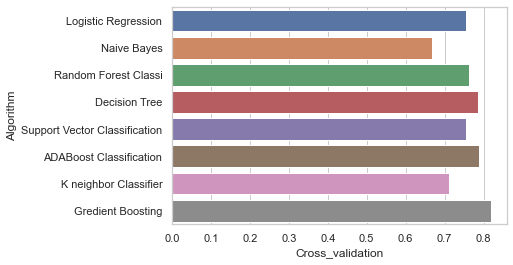

In [234]:
# Algorithm performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm",x="Cross_validation",data=final_card)

### Gradient Boost Classifier Has the best performance based on cross validation score

### Hyperparametric Tuning

#### Grid Search Cv

In [236]:
from sklearn.model_selection import GridSearchCV

In [238]:
loss = ["deviance","exponential"]
criterion = ["friedman_mse","mse","mae"]
n_estimators = [100,150,200,250]

#### Parameters for Gradient Boost

In [239]:
parameters = {
    "loss":loss,
    "criterion":criterion,
    "n_estimators":n_estimators
}

In [240]:
print(parameters)

{'loss': ['deviance', 'exponential'], 'criterion': ['friedman_mse', 'mse', 'mae'], 'n_estimators': [100, 150, 200, 250]}


In [241]:
es = GradientBoostingClassifier()

#### GRID SEARCH CV

In [242]:
grid_search=GridSearchCV(estimator=es,param_grid=parameters,cv=3,n_jobs=-1,verbose=2)

In [243]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  2.1min finished


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 200, 250]},
             verbose=2)

#### Best Estinators

In [244]:
grid_search.best_estimator_

GradientBoostingClassifier(criterion='mse', n_estimators=200)

#### Best Parameters

In [245]:
grid_search.best_params_

{'criterion': 'mse', 'loss': 'deviance', 'n_estimators': 200}

#### Best Score

In [246]:
grid_search.best_score_

0.7986394557823129

In [247]:
predictions = grid_search.predict(X_test)

### Confusion Matrix

In [248]:
print(confusion_matrix(y_test,predictions))

[[178  15]
 [ 20  32]]


### Classification Report

In [249]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       193
           1       0.68      0.62      0.65        52

    accuracy                           0.86       245
   macro avg       0.79      0.77      0.78       245
weighted avg       0.85      0.86      0.85       245



In [250]:
grid_search

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 200, 250]},
             verbose=2)

### ROC AUC CURVE

In [251]:
from sklearn.metrics import roc_curve,roc_auc_score

In [252]:
y_pred_prob = grid_search.predict_proba(X_test)[:,1]

In [253]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

In [254]:
fpr

array([0.        , 0.        , 0.00518135, 0.00518135, 0.01036269,
       0.01036269, 0.01554404, 0.01554404, 0.02590674, 0.02590674,
       0.03108808, 0.03108808, 0.03626943, 0.03626943, 0.05181347,
       0.05181347, 0.06217617, 0.06217617, 0.07253886, 0.07253886,
       0.07772021, 0.07772021, 0.08290155, 0.08290155, 0.0880829 ,
       0.0880829 , 0.09326425, 0.09326425, 0.10880829, 0.10880829,
       0.11917098, 0.11917098, 0.12435233, 0.12435233, 0.12953368,
       0.12953368, 0.13471503, 0.13471503, 0.13989637, 0.13989637,
       0.23316062, 0.23316062, 0.60103627, 0.60103627, 0.6373057 ,
       0.6373057 , 0.70466321, 0.70466321, 0.70984456, 0.70984456,
       0.99481865, 0.99481865, 1.        ])

In [255]:
tpr

array([0.        , 0.01923077, 0.01923077, 0.03846154, 0.03846154,
       0.05769231, 0.05769231, 0.19230769, 0.19230769, 0.26923077,
       0.26923077, 0.30769231, 0.30769231, 0.32692308, 0.32692308,
       0.34615385, 0.34615385, 0.42307692, 0.42307692, 0.53846154,
       0.53846154, 0.63461538, 0.63461538, 0.67307692, 0.67307692,
       0.69230769, 0.69230769, 0.71153846, 0.71153846, 0.76923077,
       0.76923077, 0.80769231, 0.80769231, 0.82692308, 0.82692308,
       0.84615385, 0.84615385, 0.86538462, 0.86538462, 0.88461538,
       0.88461538, 0.90384615, 0.90384615, 0.92307692, 0.92307692,
       0.94230769, 0.94230769, 0.96153846, 0.96153846, 0.98076923,
       0.98076923, 1.        , 1.        ])

In [256]:
thresholds

array([1.99415972, 0.99415972, 0.98901959, 0.98248841, 0.98024649,
       0.9755575 , 0.97243151, 0.91675991, 0.87199658, 0.81890416,
       0.81523802, 0.79325586, 0.79112053, 0.75512532, 0.70839598,
       0.70585075, 0.68433799, 0.62207908, 0.59237365, 0.5587955 ,
       0.55566224, 0.499129  , 0.47798105, 0.46614809, 0.46315124,
       0.46117676, 0.45911856, 0.45243326, 0.44208786, 0.3905179 ,
       0.38008568, 0.370655  , 0.35764804, 0.3488327 , 0.33204541,
       0.33182538, 0.3296981 , 0.329504  , 0.31877266, 0.31322382,
       0.10832649, 0.10767183, 0.03341628, 0.03302817, 0.02966176,
       0.02907942, 0.02311681, 0.02306338, 0.0224608 , 0.02235343,
       0.00744663, 0.00630577, 0.00372422])

Text(0.5, 1.0, 'Gradient Boost Algorithm')

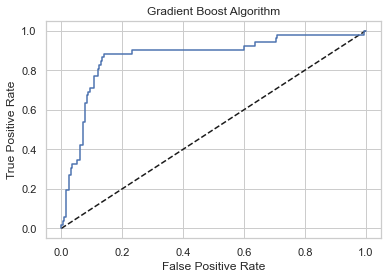

In [257]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Gradient Boost Classification")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boost Algorithm')

#### Based on ROC AUC curve the model is performing good

## Saving the model using Pickle

In [258]:
import pickle

In [259]:
with open("model_pickle","wb") as f:
    
    pickle.dump(grid_search,f)

In [260]:
with open("model_pickle","rb") as f:
    
    fraud = pickle.load(f)

## Conclusion

In [261]:
cm = confusion_matrix(y_test,predictions)

<AxesSubplot:>

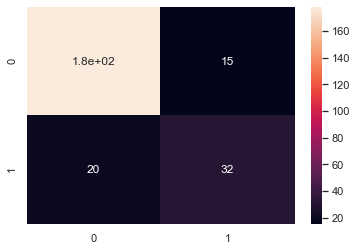

In [262]:
sns.heatmap(data=cm,annot=True)

In [263]:
# Comparing predicted value vs actual value
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]

### Most of the predictions are right